In [5]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import csv
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# Query by text search
# Setting variables to be used in format string command below
tweet_count = 500
text_query = "Shark Tank"
since_date = "2019-01-01"
until_date = "2021-01-01"

# Using OS library to call CLI commands in Python
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))


# Reads the json generated from the CLI command above and creates a pandas dataframe
df1 = pd.read_json('text-query-tweets.json', lines=True)

In [7]:
df1.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,snscrape.modules.twitter.Tweet,https://twitter.com/caitlin__cara/status/13447...,2020-12-31 23:58:25+00:00,"Feb 11, 2020: hosted my first Sampling with th...","Feb 11, 2020: hosted my first Sampling with th...",1344795076124262400,"{'_type': 'snscrape.modules.twitter.User', 'us...",4,0,20,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/TheWizardOfIce/status/1344...,2020-12-31 23:54:23+00:00,@ECochnar @AliBondGirl I agree with the first ...,@ECochnar @AliBondGirl I agree with the first ...,1344794058535923713,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,...,NaN,None,1.344764e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/Virgini43077700/status/134...,2020-12-31 23:52:30+00:00,@misspell @Cecilyjk @msdeb903 @yashar Love it....,@misspell @Cecilyjk @msdeb903 @yashar Love it....,1344793584738959360,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,0,0,...,NaN,None,1.344759e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/RemyLabaux/status/13447933...,2020-12-31 23:51:41+00:00,@Dracalous @aghenis @AlpKelvyn @ksorbs I read ...,@Dracalous @aghenis @AlpKelvyn @ksorbs I read ...,1344793381503967233,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1.344785e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/ButchMoore15/status/134479...,2020-12-31 23:49:58+00:00,@mcuban Mark your the biggest hypocrite on the...,@mcuban Mark your the biggest hypocrite on the...,1344792946932133888,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,...,NaN,None,1.344753e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None


In [8]:
tweet_count = 500
text_query = "shark tank Memes"
#since_date = "2019-01-01"
#until_date = "2021-01-01"

# Using OS library to call CLI commands in Python
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))


# Reads the json generated from the CLI command above and creates a pandas dataframe
df2 = pd.read_json('text-query-tweets.json', lines=True)

In [9]:
df2.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,snscrape.modules.twitter.Tweet,https://twitter.com/fremadethis/status/1343903...,2020-12-29 12:56:16+00:00,Kevin : I'm Kevin\nRobert : I'm Robert.\nLori ...,Kevin : I'm Kevin\nRobert : I'm Robert.\nLori ...,1343903663882870784,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,None,NaN,None,None,None,None,None,NaN,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/Kiri1898/status/1342363925...,2020-12-25 06:57:54+00:00,Toca su capitulito de shark tank pa ir bien a ...,Toca su capitulito de shark tank pa ir bien a ...,1342363925711626240,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,None,NaN,None,None,None,None,None,NaN,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/roleodelavword/status/1342...,2020-12-24 17:50:18+00:00,@xcupofme Tengo muchos memes de shark tank jaj...,@xcupofme Tengo muchos memes de shark tank jaj...,1342165721535684609,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,NaN,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/baconranchwrap/status/1340...,2020-12-20 19:56:50+00:00,Huge fan of the shark tank cock meme meta,Huge fan of the shark tank cock meme meta,1340748012340047872,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,None,NaN,None,None,None,None,None,NaN,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/Pollisaurio/status/1338940...,2020-12-15 20:14:41+00:00,"Mi jefa dijo ""Sharknado"" en lugar de ""Shark Ta...","Mi jefa dijo ""Sharknado"" en lugar de ""Shark Ta...",1338940563425550337,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,9,...,NaN,None,NaN,None,None,None,None,None,NaN,None


In [10]:
frames = [df1, df2]

In [11]:
result = pd.concat(frames)

In [12]:
df=pd.DataFrame(result)

In [13]:
df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,snscrape.modules.twitter.Tweet,https://twitter.com/caitlin__cara/status/13447...,2020-12-31 23:58:25+00:00,"Feb 11, 2020: hosted my first Sampling with th...","Feb 11, 2020: hosted my first Sampling with th...",1344795076124262400,"{'_type': 'snscrape.modules.twitter.User', 'us...",4,0,20,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,None,None,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",None,None,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/TheWizardOfIce/status/1344...,2020-12-31 23:54:23+00:00,@ECochnar @AliBondGirl I agree with the first ...,@ECochnar @AliBondGirl I agree with the first ...,1344794058535923713,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,...,NaN,None,1.344764e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/Virgini43077700/status/134...,2020-12-31 23:52:30+00:00,@misspell @Cecilyjk @msdeb903 @yashar Love it....,@misspell @Cecilyjk @msdeb903 @yashar Love it....,1344793584738959360,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,0,0,...,NaN,None,1.344759e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/RemyLabaux/status/13447933...,2020-12-31 23:51:41+00:00,@Dracalous @aghenis @AlpKelvyn @ksorbs I read ...,@Dracalous @aghenis @AlpKelvyn @ksorbs I read ...,1344793381503967233,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1.344785e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/ButchMoore15/status/134479...,2020-12-31 23:49:58+00:00,@mcuban Mark your the biggest hypocrite on the...,@mcuban Mark your the biggest hypocrite on the...,1344792946932133888,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,...,NaN,None,1.344753e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None


In [14]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Removed @mentions
    text = re.sub(r'#','',text) #Removing the # symbols
    text = re.sub(r':','',text) #Removing the : symbols
    text = re.sub(r'_','',text) #Removing the : symbols
    text = re.sub(r'RT[\s]+','',text) #Removing RT
    text = re.sub(r'https?:\/\/\S+','', text) # Removing the hyper link
    return text
df['content']=df['content'].apply(cleanText)

In [15]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


In [16]:
df['Subjectivity'] = df['content'].apply(getSubjectivity)
df['Polarity'] = df['content'].apply(getPolarity)

df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,Subjectivity,Polarity
0,snscrape.modules.twitter.Tweet,https://twitter.com/caitlin__cara/status/13447...,2020-12-31 23:58:25+00:00,"Feb 11, 2020 hosted my first Sampling with the...","Feb 11, 2020: hosted my first Sampling with th...",1344795076124262400,"{'_type': 'snscrape.modules.twitter.User', 'us...",4,0,20,...,NaN,None,None,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",None,None,None,0.444444,0.416667
1,snscrape.modules.twitter.Tweet,https://twitter.com/TheWizardOfIce/status/1344...,2020-12-31 23:54:23+00:00,I agree with the first part of your statemen...,@ECochnar @AliBondGirl I agree with the first ...,1344794058535923713,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,...,1.344764e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None,0.681313,-0.132828
2,snscrape.modules.twitter.Tweet,https://twitter.com/Virgini43077700/status/134...,2020-12-31 23:52:30+00:00,Love it. Great idea. Is that a Shark Tank ...,@misspell @Cecilyjk @msdeb903 @yashar Love it....,1344793584738959360,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,0,0,...,1.344759e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None,0.675000,0.650000
3,snscrape.modules.twitter.Tweet,https://twitter.com/RemyLabaux/status/13447933...,2020-12-31 23:51:41+00:00,"I read alot of books, got the shark tank l...",@Dracalous @aghenis @AlpKelvyn @ksorbs I read ...,1344793381503967233,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,1.344785e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None,0.750000,0.693750
4,snscrape.modules.twitter.Tweet,https://twitter.com/ButchMoore15/status/134479...,2020-12-31 23:49:58+00:00,"Mark your the biggest hypocrite on the plant,...",@mcuban Mark your the biggest hypocrite on the...,1344792946932133888,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,...,1.344753e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None,0.580000,0.412187


In [17]:
df.to_csv('~/Desktop/finaldata1.csv')

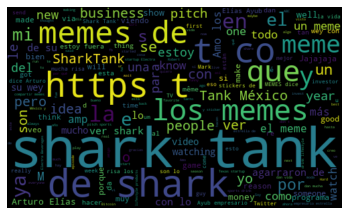

In [18]:
allWords=' '.join([twts for twts in df['content']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head()

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,Subjectivity,Polarity,Analysis
0,snscrape.modules.twitter.Tweet,https://twitter.com/caitlin__cara/status/13447...,2020-12-31 23:58:25+00:00,"Feb 11, 2020 hosted my first Sampling with the...","Feb 11, 2020: hosted my first Sampling with th...",1344795076124262400,"{'_type': 'snscrape.modules.twitter.User', 'us...",4,0,20,...,None,None,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...",None,None,None,0.444444,0.416667,Positive
1,snscrape.modules.twitter.Tweet,https://twitter.com/TheWizardOfIce/status/1344...,2020-12-31 23:54:23+00:00,I agree with the first part of your statemen...,@ECochnar @AliBondGirl I agree with the first ...,1344794058535923713,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,3,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None,0.681313,-0.132828,Negative
2,snscrape.modules.twitter.Tweet,https://twitter.com/Virgini43077700/status/134...,2020-12-31 23:52:30+00:00,Love it. Great idea. Is that a Shark Tank ...,@misspell @Cecilyjk @msdeb903 @yashar Love it....,1344793584738959360,"{'_type': 'snscrape.modules.twitter.User', 'us...",3,0,0,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None,0.675000,0.650000,Positive
3,snscrape.modules.twitter.Tweet,https://twitter.com/RemyLabaux/status/13447933...,2020-12-31 23:51:41+00:00,"I read alot of books, got the shark tank l...",@Dracalous @aghenis @AlpKelvyn @ksorbs I read ...,1344793381503967233,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None,0.750000,0.693750,Positive
4,snscrape.modules.twitter.Tweet,https://twitter.com/ButchMoore15/status/134479...,2020-12-31 23:49:58+00:00,"Mark your the biggest hypocrite on the plant,...",@mcuban Mark your the biggest hypocrite on the...,1344792946932133888,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,1,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,None,None,0.580000,0.412187,Positive


<function matplotlib.pyplot.show(close=None, block=None)>

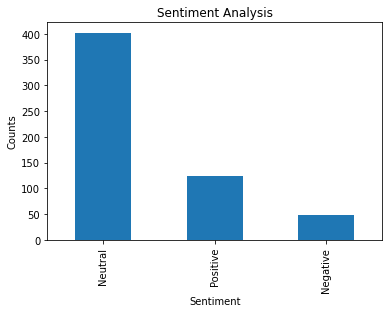

In [20]:
# Show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
result['Analysis'].value_counts().plot(kind='bar')
plt.show